# EDA for E-commerce Fraud Data

## Objective
Explore and analyze the e-commerce fraud dataset to understand patterns, identify anomalies, and prepare for feature engineering.

## Dataset Overview
- **Fraud_Data.csv**: Contains e-commerce transaction data
- **IpAddress_to_Country.csv**: Maps IP addresses to countries
- **Target Variable**: `class` (1 = fraud, 0 = legitimate)

## Key Tasks
1. Load and inspect the data
2. Clean the data (missing values, duplicates, data types)
3. Univariate analysis of all features
4. Bivariate analysis with target variable
5. Geolocation analysis using IP addresses
6. Time-based pattern analysis
7. Class imbalance assessment

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## Data Loading and Initial Inspection

Let's load both datasets and perform initial inspection to understand the data structure.

In [5]:
# Load the datasets
print("Loading datasets...")
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

print(f"\nFraud Data Shape: {fraud_df.shape}")
print(f"IP-Country Data Shape: {ip_df.shape}")

# Display first few rows
print("\n Fraud Data Head:")
display(fraud_df.head())

print("\n IP-Country Data Head:")
display(ip_df.head())

# Basic information
print("\n Fraud Data Info:")
fraud_df.info()

Loading datasets...

Fraud Data Shape: (151112, 11)
IP-Country Data Shape: (138846, 3)

 Fraud Data Head:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0



 IP-Country Data Head:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China



 Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


## Data Cleaning and Preprocessing

Let's clean the data by:
1. Checking for missing values
2. Removing duplicates
3. Converting data types
4. Handling IP addresses

In [6]:
print("="*50)
print("DATA CLEANING AND PREPROCESSING")
print("="*50)

# 1. Check for missing values
print("\n1. Missing Values Analysis:")
missing_counts = fraud_df.isnull().sum()
missing_percent = (missing_counts / len(fraud_df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent
})

# Display columns with missing values
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]
if len(missing_df_filtered) > 0:
    display(missing_df_filtered)
else:
    print(" No missing values found in fraud data")

# 2. Check for duplicates
print(f"\n2. Duplicate Analysis:")
duplicate_count = fraud_df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    fraud_df = fraud_df.drop_duplicates()
    print(f" Removed {duplicate_count} duplicate rows")
else:
    print(" No duplicates found")

# 3. Convert data types
print("\n3. Data Type Conversion:")

# Convert timestamps to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
print(" Converted signup_time and purchase_time to datetime")

# Convert target to integer
fraud_df['class'] = fraud_df['class'].astype(int)
print(" Converted class to integer")

# Convert IP address to integer
def ip_to_int(ip):
    """Convert IP address to integer"""
    try:
        if isinstance(ip, (float, int)):
            return int(ip)
        return np.nan
    except:
        return np.nan

fraud_df['ip_address_int'] = fraud_df['ip_address'].apply(ip_to_int)
print("Added ip_address_int column")

# 4. Clean IP country data
ip_df['lower_bound_ip_address'] = pd.to_numeric(ip_df['lower_bound_ip_address'], errors='coerce')
ip_df['upper_bound_ip_address'] = pd.to_numeric(ip_df['upper_bound_ip_address'], errors='coerce')
print(" Cleaned IP country data")

print(f"\n Updated Fraud Data Shape: {fraud_df.shape}")
print(f" Updated IP Country Data Shape: {ip_df.shape}")

# Display sample after cleaning
print("\n Sample after cleaning:")
display(fraud_df[['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'class', 'ip_address_int']].head())

DATA CLEANING AND PREPROCESSING

1. Missing Values Analysis:
 No missing values found in fraud data

2. Duplicate Analysis:
Total duplicate rows: 0
 No duplicates found

3. Data Type Conversion:
 Converted signup_time and purchase_time to datetime
 Converted class to integer
Added ip_address_int column
 Cleaned IP country data

 Updated Fraud Data Shape: (151112, 12)
 Updated IP Country Data Shape: (138846, 3)

 Sample after cleaning:


,user_id,signup_time,purchase_time,purchase_value,class,ip_address_int
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,0,732758368
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,0,350311387
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,1,2621473820
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,0,3840542443
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,0,415583117


## Geolocation Integration

Now let's merge the fraud data with IP-country mapping to analyze fraud patterns by country.

In [ ]:
print("="*50)
print("GEOLOCATION INTEGRATION")
print("="*50)

# Check data types before merging
print("\n Checking data types:")
print(f"fraud_df['ip_address_int'] dtype: {fraud_df['ip_address_int'].dtype}")
print(f"ip_df['lower_bound_ip_address'] dtype: {ip_df['lower_bound_ip_address'].dtype}")

# Ensure both are the same type (convert to int64)
fraud_df['ip_address_int'] = fraud_df['ip_address_int'].astype('int64')
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype('int64')
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype('int64')

print("\n Converted IP columns to int64")
print(f"fraud_df['ip_address_int'] dtype: {fraud_df['ip_address_int'].dtype}")
print(f"ip_df['lower_bound_ip_address'] dtype: {ip_df['lower_bound_ip_address'].dtype}")

# Sort dataframes for merge_asof
ip_df_sorted = ip_df.sort_values('lower_bound_ip_address')
fraud_df_sorted = fraud_df.sort_values('ip_address_int')

# Merge using pandas merge_asof (range-based lookup)
print("\nMerging fraud data with IP-country mapping...")
merged_df = pd.merge_asof(
    fraud_df_sorted,
    ip_df_sorted,
    left_on='ip_address_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter rows where ip_address_int is within the range
initial_count = len(merged_df)
merged_df = merged_df[
    (merged_df['ip_address_int'] >= merged_df['lower_bound_ip_address']) &
    (merged_df['ip_address_int'] <= merged_df['upper_bound_ip_address'])
]
final_count = len(merged_df)

print(f"  Merge completed successfully")
print(f"   - Before filtering: {initial_count:,} rows")
print(f"   - After filtering: {final_count:,} rows")
print(f"   - Success rate: {final_count/initial_count*100:.2f}%")

# Check for missing country mappings
missing_country = merged_df['country'].isnull().sum()
print(f"   - Rows without country mapping: {missing_country} ({missing_country/len(merged_df)*100:.2f}%)")

print(f"\n Merged Data Shape: {merged_df.shape}")
print("\n Merged data sample:")
display(merged_df[['user_id', 'ip_address_int', 'country', 'class']].head())

# Country mapping statistics
if 'country' in merged_df.columns:
    country_counts = merged_df['country'].value_counts()
    print(f"\n Top 10 countries by transaction count:")
    display(country_counts.head(10))

print("\n Geolocation integration completed!")

GEOLOCATION INTEGRATION

 Checking data types:
fraud_df['ip_address_int'] dtype: int64
ip_df['lower_bound_ip_address'] dtype: float64

 Converted IP columns to int64
fraud_df['ip_address_int'] dtype: int64
ip_df['lower_bound_ip_address'] dtype: int64

Merging fraud data with IP-country mapping...
  Merge completed successfully
   - Before filtering: 151,112 rows
   - After filtering: 129,146 rows
   - Success rate: 85.46%
   - Rows without country mapping: 0 (0.00%)

 Merged Data Shape: (129146, 15)

 Merged data sample:


,user_id,ip_address_int,country,class
634,247547,16778864,Australia,0
635,220737,16842045,Thailand,0
636,390400,16843656,China,0
637,69592,16938732,China,0
638,174987,16971984,Thailand,0



 Top 10 countries by transaction count:


country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
Name: count, dtype: int64


 Geolocation integration completed!


## Class Imbalance Analysis

Let's analyze the distribution of fraudulent vs legitimate transactions. This is crucial for selecting appropriate evaluation metrics and modeling techniques.

CLASS IMBALANCE ANALYSIS


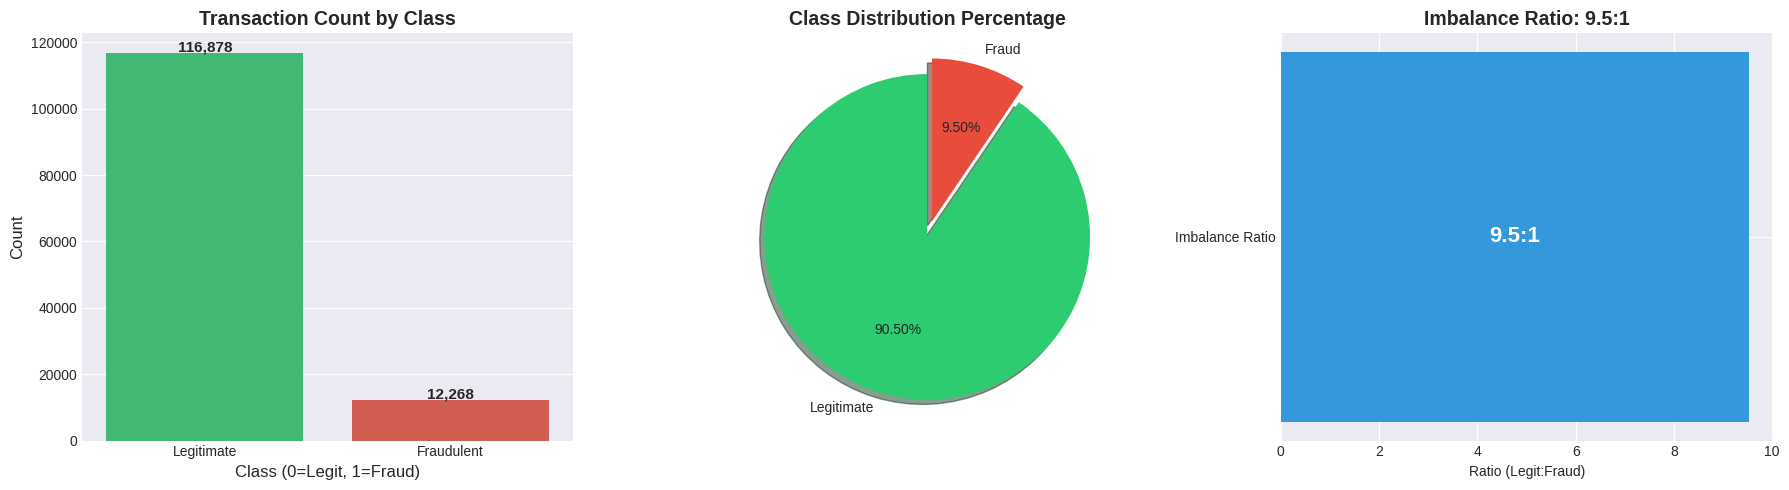


 CLASS DISTRIBUTION DETAILS:
----------------------------------------
Total transactions analyzed: 129,146
Legitimate transactions (0): 116,878 (90.5007%)
Fraudulent transactions (1): 12,268 (9.4993%)

Imbalance Ratio: 9.53:1
Fraud Rate: 9.4993%

  BUSINESS IMPLICATIONS:
----------------------------------------
• This is a HIGHLY imbalanced dataset (typical for fraud detection)
• Accuracy alone is NOT a good evaluation metric
• Need to focus on Precision, Recall, and F1-Score
• Must handle imbalance during model training (SMOTE/undersampling)
• Business cost of false negatives (missed fraud) is very high

 Key takeaway: We'll need to use appropriate techniques for imbalanced data.


In [9]:
print("="*50)
print("CLASS IMBALANCE ANALYSIS")
print("="*50)

# Calculate class distribution
class_counts = merged_df['class'].value_counts()
class_percent = merged_df['class'].value_counts(normalize=True) * 100

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Count plot
sns.barplot(x=class_counts.index, y=class_counts.values, ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Transaction Count by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Legit, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Legitimate', 'Fraudulent'])
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontsize=11, fontweight='bold')

# 2. Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraud'], 
           autopct='%1.2f%%', startangle=90, colors=colors,
           explode=(0, 0.1), shadow=True)
axes[1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

# 3. Imbalance ratio visualization
imbalance_ratio = class_counts[0] / class_counts[1]
axes[2].barh(['Imbalance Ratio'], [imbalance_ratio], color='#3498db', height=0.3)
axes[2].set_title(f'Imbalance Ratio: {imbalance_ratio:.1f}:1', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Ratio (Legit:Fraud)')
axes[2].text(imbalance_ratio/2, 0, f'{imbalance_ratio:.1f}:1', 
            ha='center', va='center', fontsize=16, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n CLASS DISTRIBUTION DETAILS:")
print("-" * 40)
print(f"Total transactions analyzed: {len(merged_df):,}")
print(f"Legitimate transactions (0): {class_counts[0]:,} ({class_percent[0]:.4f}%)")
print(f"Fraudulent transactions (1): {class_counts[1]:,} ({class_percent[1]:.4f}%)")
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"Fraud Rate: {class_percent[1]:.4f}%")

print("\n  BUSINESS IMPLICATIONS:")
print("-" * 40)
print("• This is a HIGHLY imbalanced dataset (typical for fraud detection)")
print("• Accuracy alone is NOT a good evaluation metric")
print("• Need to focus on Precision, Recall, and F1-Score")
print("• Must handle imbalance during model training (SMOTE/undersampling)")
print("• Business cost of false negatives (missed fraud) is very high")

print("\n Key takeaway: We'll need to use appropriate techniques for imbalanced data.")

## Univariate Analysis - Numerical Features

Let's examine the distribution of numerical features to understand their characteristics and identify any outliers.

UNIVARIATE ANALYSIS - NUMERICAL FEATURES
Analyzing 2 numerical features: ['purchase_value', 'age']


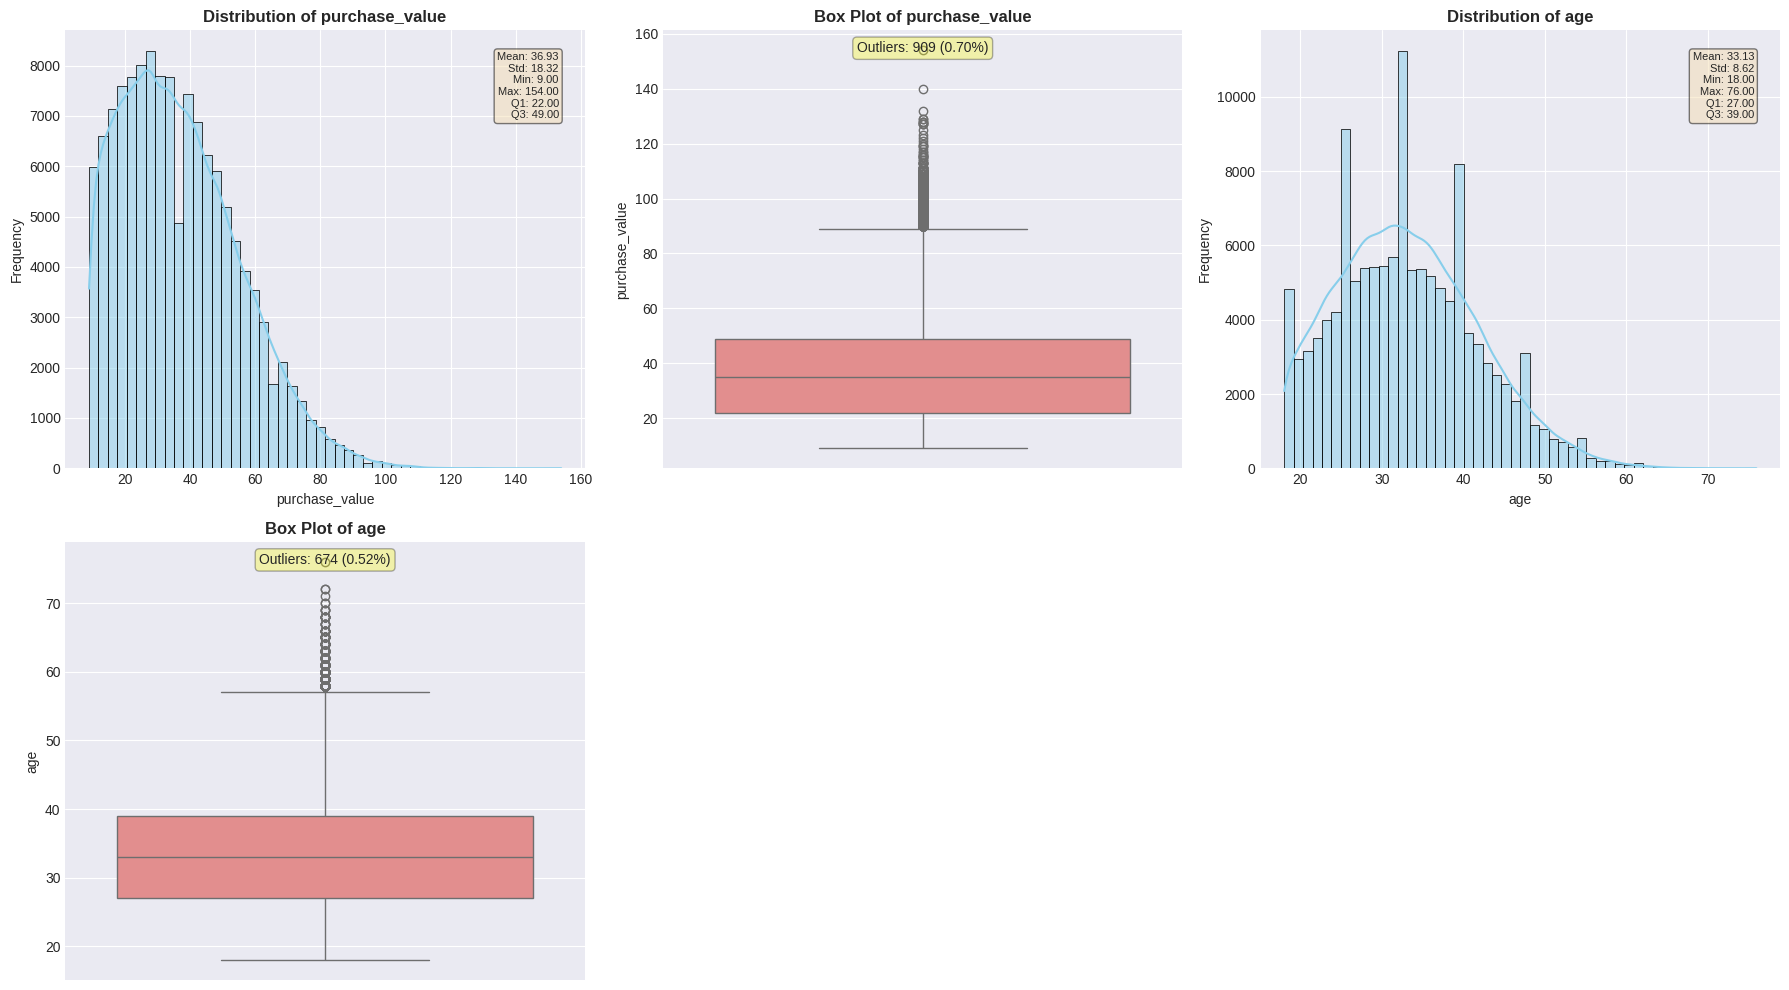


 SUMMARY STATISTICS FOR NUMERICAL FEATURES:
--------------------------------------------------


,purchase_value,age
count,129146.000000,129146.000000
mean,36.932456,33.128413
std,18.317798,8.615297
min,9.000000,18.000000
25%,22.000000,27.000000
50%,35.000000,33.000000
75%,49.000000,39.000000
max,154.000000,76.000000



 KEY OBSERVATIONS:
------------------------------

PURCHASE_VALUE:
  • Range: 9.00 to 154.00
  • Skewness: 0.67 (right-skewed)
  • Kurtosis: 0.14
  • Missing values: 0

AGE:
  • Range: 18.00 to 76.00
  • Skewness: 0.43 (approximately symmetric)
  • Kurtosis: -0.17
  • Missing values: 0

 Univariate analysis of numerical features completed!


In [10]:
print("="*50)
print("UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("="*50)

# Select numerical features
numerical_cols = ['purchase_value', 'age']
if 'time_since_signup' in merged_df.columns:
    numerical_cols.append('time_since_signup')

print(f"Analyzing {len(numerical_cols)} numerical features: {numerical_cols}")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if col in merged_df.columns:
        # Plot 1: Histogram with KDE
        sns.histplot(merged_df[col], kde=True, ax=axes[idx*2], color='skyblue', bins=50)
        axes[idx*2].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx*2].set_xlabel(col)
        axes[idx*2].set_ylabel('Frequency')
        
        # Add statistics
        stats_text = f'Mean: {merged_df[col].mean():.2f}\nStd: {merged_df[col].std():.2f}\n'
        stats_text += f'Min: {merged_df[col].min():.2f}\nMax: {merged_df[col].max():.2f}\n'
        stats_text += f'Q1: {merged_df[col].quantile(0.25):.2f}\nQ3: {merged_df[col].quantile(0.75):.2f}'
        axes[idx*2].text(0.95, 0.95, stats_text, transform=axes[idx*2].transAxes,
                        fontsize=8, verticalalignment='top', horizontalalignment='right',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        # Plot 2: Box plot
        sns.boxplot(y=merged_df[col], ax=axes[idx*2+1], color='lightcoral')
        axes[idx*2+1].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
        axes[idx*2+1].set_ylabel(col)
        
        # Add outlier count
        Q1 = merged_df[col].quantile(0.25)
        Q3 = merged_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)]
        axes[idx*2+1].text(0.5, 0.95, f'Outliers: {len(outliers):,} ({len(outliers)/len(merged_df)*100:.2f}%)',
                          transform=axes[idx*2+1].transAxes, ha='center', fontsize=10,
                          bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# Hide any unused axes
for idx in range(len(numerical_cols)*2, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n SUMMARY STATISTICS FOR NUMERICAL FEATURES:")
print("-" * 50)
summary_stats = merged_df[numerical_cols].describe()
display(summary_stats)

print("\n KEY OBSERVATIONS:")
print("-" * 30)
for col in numerical_cols:
    if col in merged_df.columns:
        print(f"\n{col.upper()}:")
        print(f"  • Range: {merged_df[col].min():.2f} to {merged_df[col].max():.2f}")
        print(f"  • Skewness: {merged_df[col].skew():.2f} {'(right-skewed)' if merged_df[col].skew() > 0.5 else '(approximately symmetric)'}")
        print(f"  • Kurtosis: {merged_df[col].kurtosis():.2f}")
        print(f"  • Missing values: {merged_df[col].isnull().sum()}")

print("\n Univariate analysis of numerical features completed!")

## Univariate Analysis - Categorical Features

Now let's analyze the categorical features to understand their distributions and cardinality.

UNIVARIATE ANALYSIS - CATEGORICAL FEATURES
Analyzing 4 categorical features


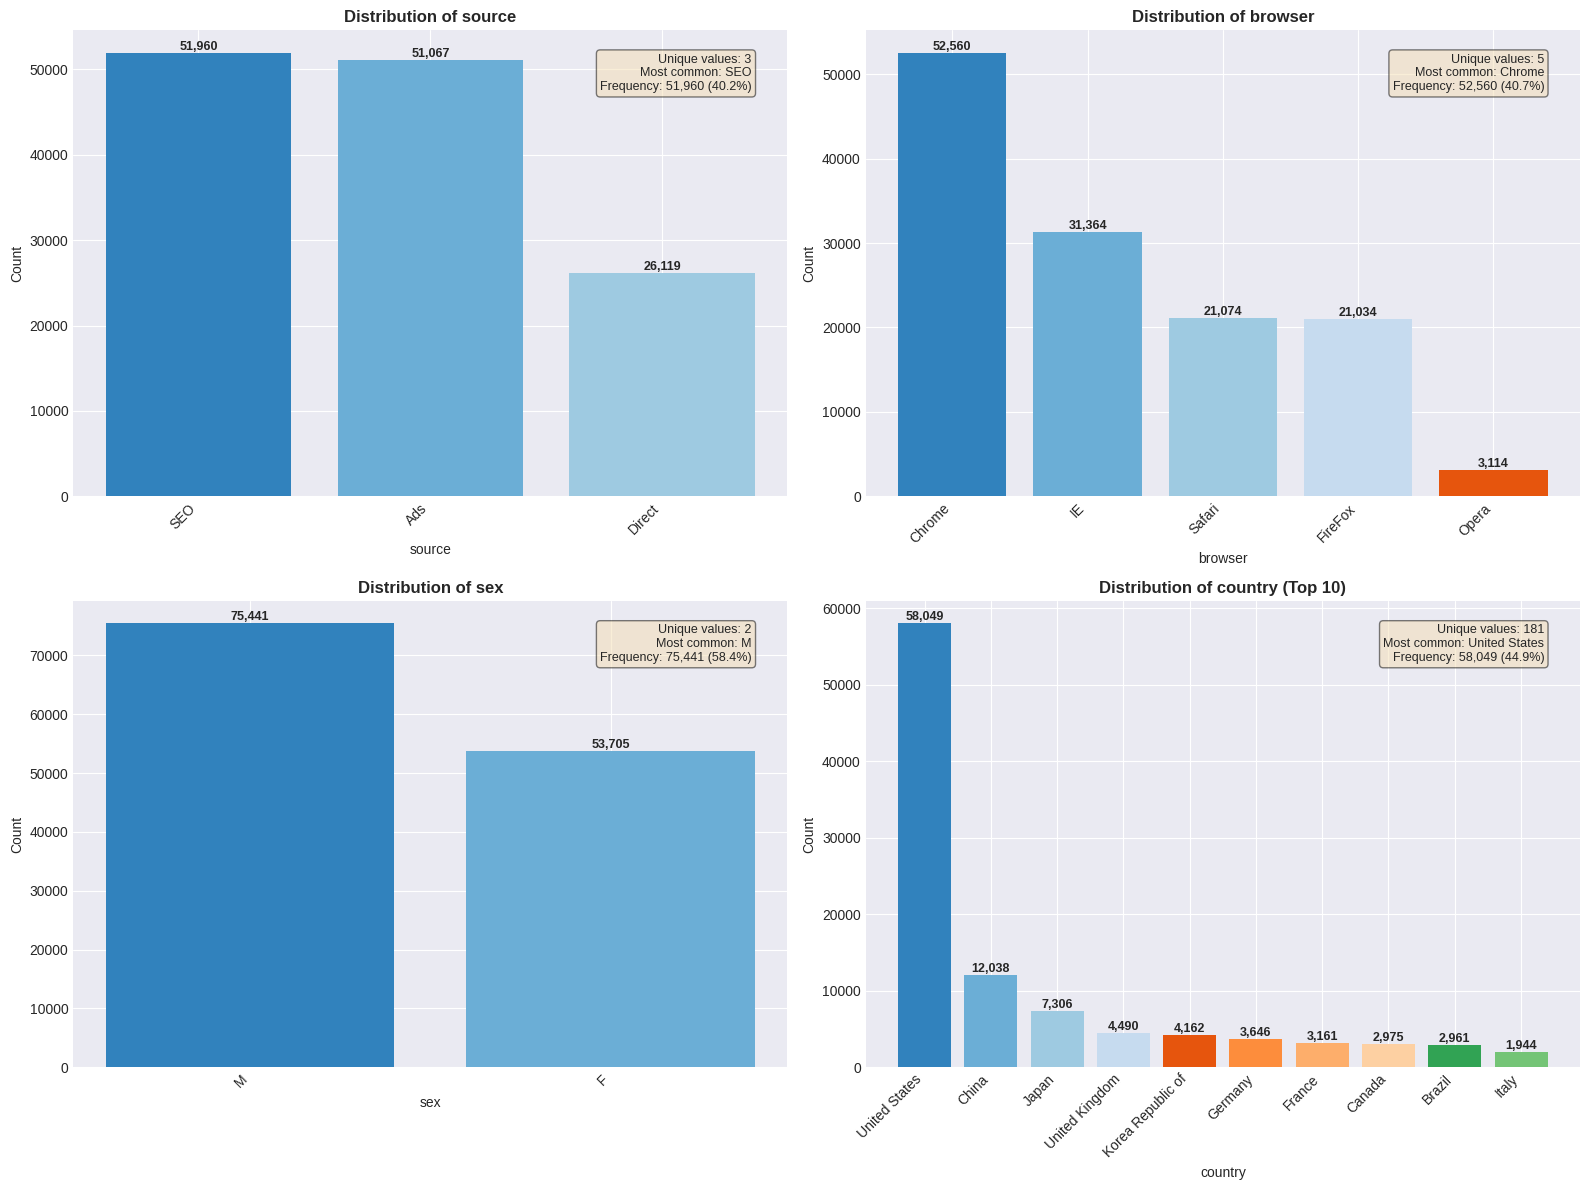


📊 CATEGORICAL FEATURES SUMMARY:
------------------------------------------------------------


,Feature,Unique Values,Most Common,Mode %,Missing
0,source,3,SEO,40.23%,0
1,browser,5,Chrome,40.70%,0
2,sex,2,M,58.42%,0
3,country,181,United States,44.95%,0



🔍 KEY INSIGHTS:
------------------------------

🔹 SOURCE ANALYSIS:
   Most common source: SEO
   Highest fraud rate source: Direct (10.36%)
   Lowest fraud rate source: SEO (9.17%)

🔹 BROWSER ANALYSIS:
   Most common browser: Chrome
   Highest fraud rate browser: Chrome (10.15%)
   Browsers used: 5 different types

🔹 GENDER ANALYSIS:
   Male: 58.42%
   Female: 41.58%

🔹 COUNTRY ANALYSIS:
   Countries with transactions: 181
   Highest fraud rate country: Turkmenistan (100.00%)
   Lowest fraud rate country: Zimbabwe (0.00%)

✅ Univariate analysis of categorical features completed!


In [11]:
print("="*50)
print("UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("="*50)

# Select categorical features
categorical_cols = ['source', 'browser', 'sex', 'country']
print(f"Analyzing {len(categorical_cols)} categorical features")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if col in merged_df.columns:
        # Get value counts
        value_counts = merged_df[col].value_counts()
        
        # For high cardinality features, show top 10
        if len(value_counts) > 10:
            plot_data = value_counts.head(10)
            title_suffix = " (Top 10)"
        else:
            plot_data = value_counts
            title_suffix = ""
        
        # Create bar plot
        bars = axes[idx].bar(range(len(plot_data)), plot_data.values, color=plt.cm.tab20c(range(len(plot_data))))
        axes[idx].set_title(f'Distribution of {col}{title_suffix}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].set_xticks(range(len(plot_data)))
        axes[idx].set_xticklabels(plot_data.index, rotation=45, ha='right')
        
        # Add count labels on bars
        for bar, count in zip(bars, plot_data.values):
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                          f'{count:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Add summary statistics
        stats_text = f'Unique values: {merged_df[col].nunique()}\n'
        stats_text += f'Most common: {value_counts.index[0]}\n'
        stats_text += f'Frequency: {value_counts.iloc[0]:,} ({value_counts.iloc[0]/len(merged_df)*100:.1f}%)'
        
        axes[idx].text(0.95, 0.95, stats_text, transform=axes[idx].transAxes,
                      fontsize=9, verticalalignment='top', horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Detailed statistics table
print("\n📊 CATEGORICAL FEATURES SUMMARY:")
print("-" * 60)
summary_data = []
for col in categorical_cols:
    if col in merged_df.columns:
        unique_count = merged_df[col].nunique()
        mode_value = merged_df[col].mode()[0]
        mode_percent = (merged_df[col] == mode_value).sum() / len(merged_df) * 100
        missing_count = merged_df[col].isnull().sum()
        
        summary_data.append({
            'Feature': col,
            'Unique Values': unique_count,
            'Most Common': mode_value,
            'Mode %': f'{mode_percent:.2f}%',
            'Missing': missing_count
        })

summary_df = pd.DataFrame(summary_data)
display(summary_df)

print("\n🔍 KEY INSIGHTS:")
print("-" * 30)

# Source analysis
if 'source' in merged_df.columns:
    source_fraud_rate = merged_df.groupby('source')['class'].mean().sort_values(ascending=False)
    print(f"\n🔹 SOURCE ANALYSIS:")
    print(f"   Most common source: {merged_df['source'].mode()[0]}")
    print(f"   Highest fraud rate source: {source_fraud_rate.index[0]} ({source_fraud_rate.iloc[0]*100:.2f}%)")
    print(f"   Lowest fraud rate source: {source_fraud_rate.index[-1]} ({source_fraud_rate.iloc[-1]*100:.2f}%)")

# Browser analysis
if 'browser' in merged_df.columns:
    browser_fraud_rate = merged_df.groupby('browser')['class'].mean().sort_values(ascending=False)
    print(f"\n🔹 BROWSER ANALYSIS:")
    print(f"   Most common browser: {merged_df['browser'].mode()[0]}")
    print(f"   Highest fraud rate browser: {browser_fraud_rate.index[0]} ({browser_fraud_rate.iloc[0]*100:.2f}%)")
    print(f"   Browsers used: {merged_df['browser'].nunique()} different types")

# Gender analysis
if 'sex' in merged_df.columns:
    gender_dist = merged_df['sex'].value_counts(normalize=True) * 100
    print(f"\n🔹 GENDER ANALYSIS:")
    print(f"   Male: {gender_dist.get('M', 0):.2f}%")
    print(f"   Female: {gender_dist.get('F', 0):.2f}%")

# Country analysis
if 'country' in merged_df.columns:
    country_fraud_rate = merged_df.groupby('country')['class'].mean().sort_values(ascending=False)
    print(f"\n🔹 COUNTRY ANALYSIS:")
    print(f"   Countries with transactions: {merged_df['country'].nunique()}")
    print(f"   Highest fraud rate country: {country_fraud_rate.index[0]} ({country_fraud_rate.iloc[0]*100:.2f}%)")
    print(f"   Lowest fraud rate country: {country_fraud_rate.index[-1]} ({country_fraud_rate.iloc[-1]*100:.2f}%)")

print("\n✅ Univariate analysis of categorical features completed!")

## Bivariate Analysis - Relationship with Fraud

Now let's examine how different features relate to fraud occurrence. This will help identify which features are most predictive of fraudulent transactions.

BIVARIATE ANALYSIS - RELATIONSHIP WITH FRAUD


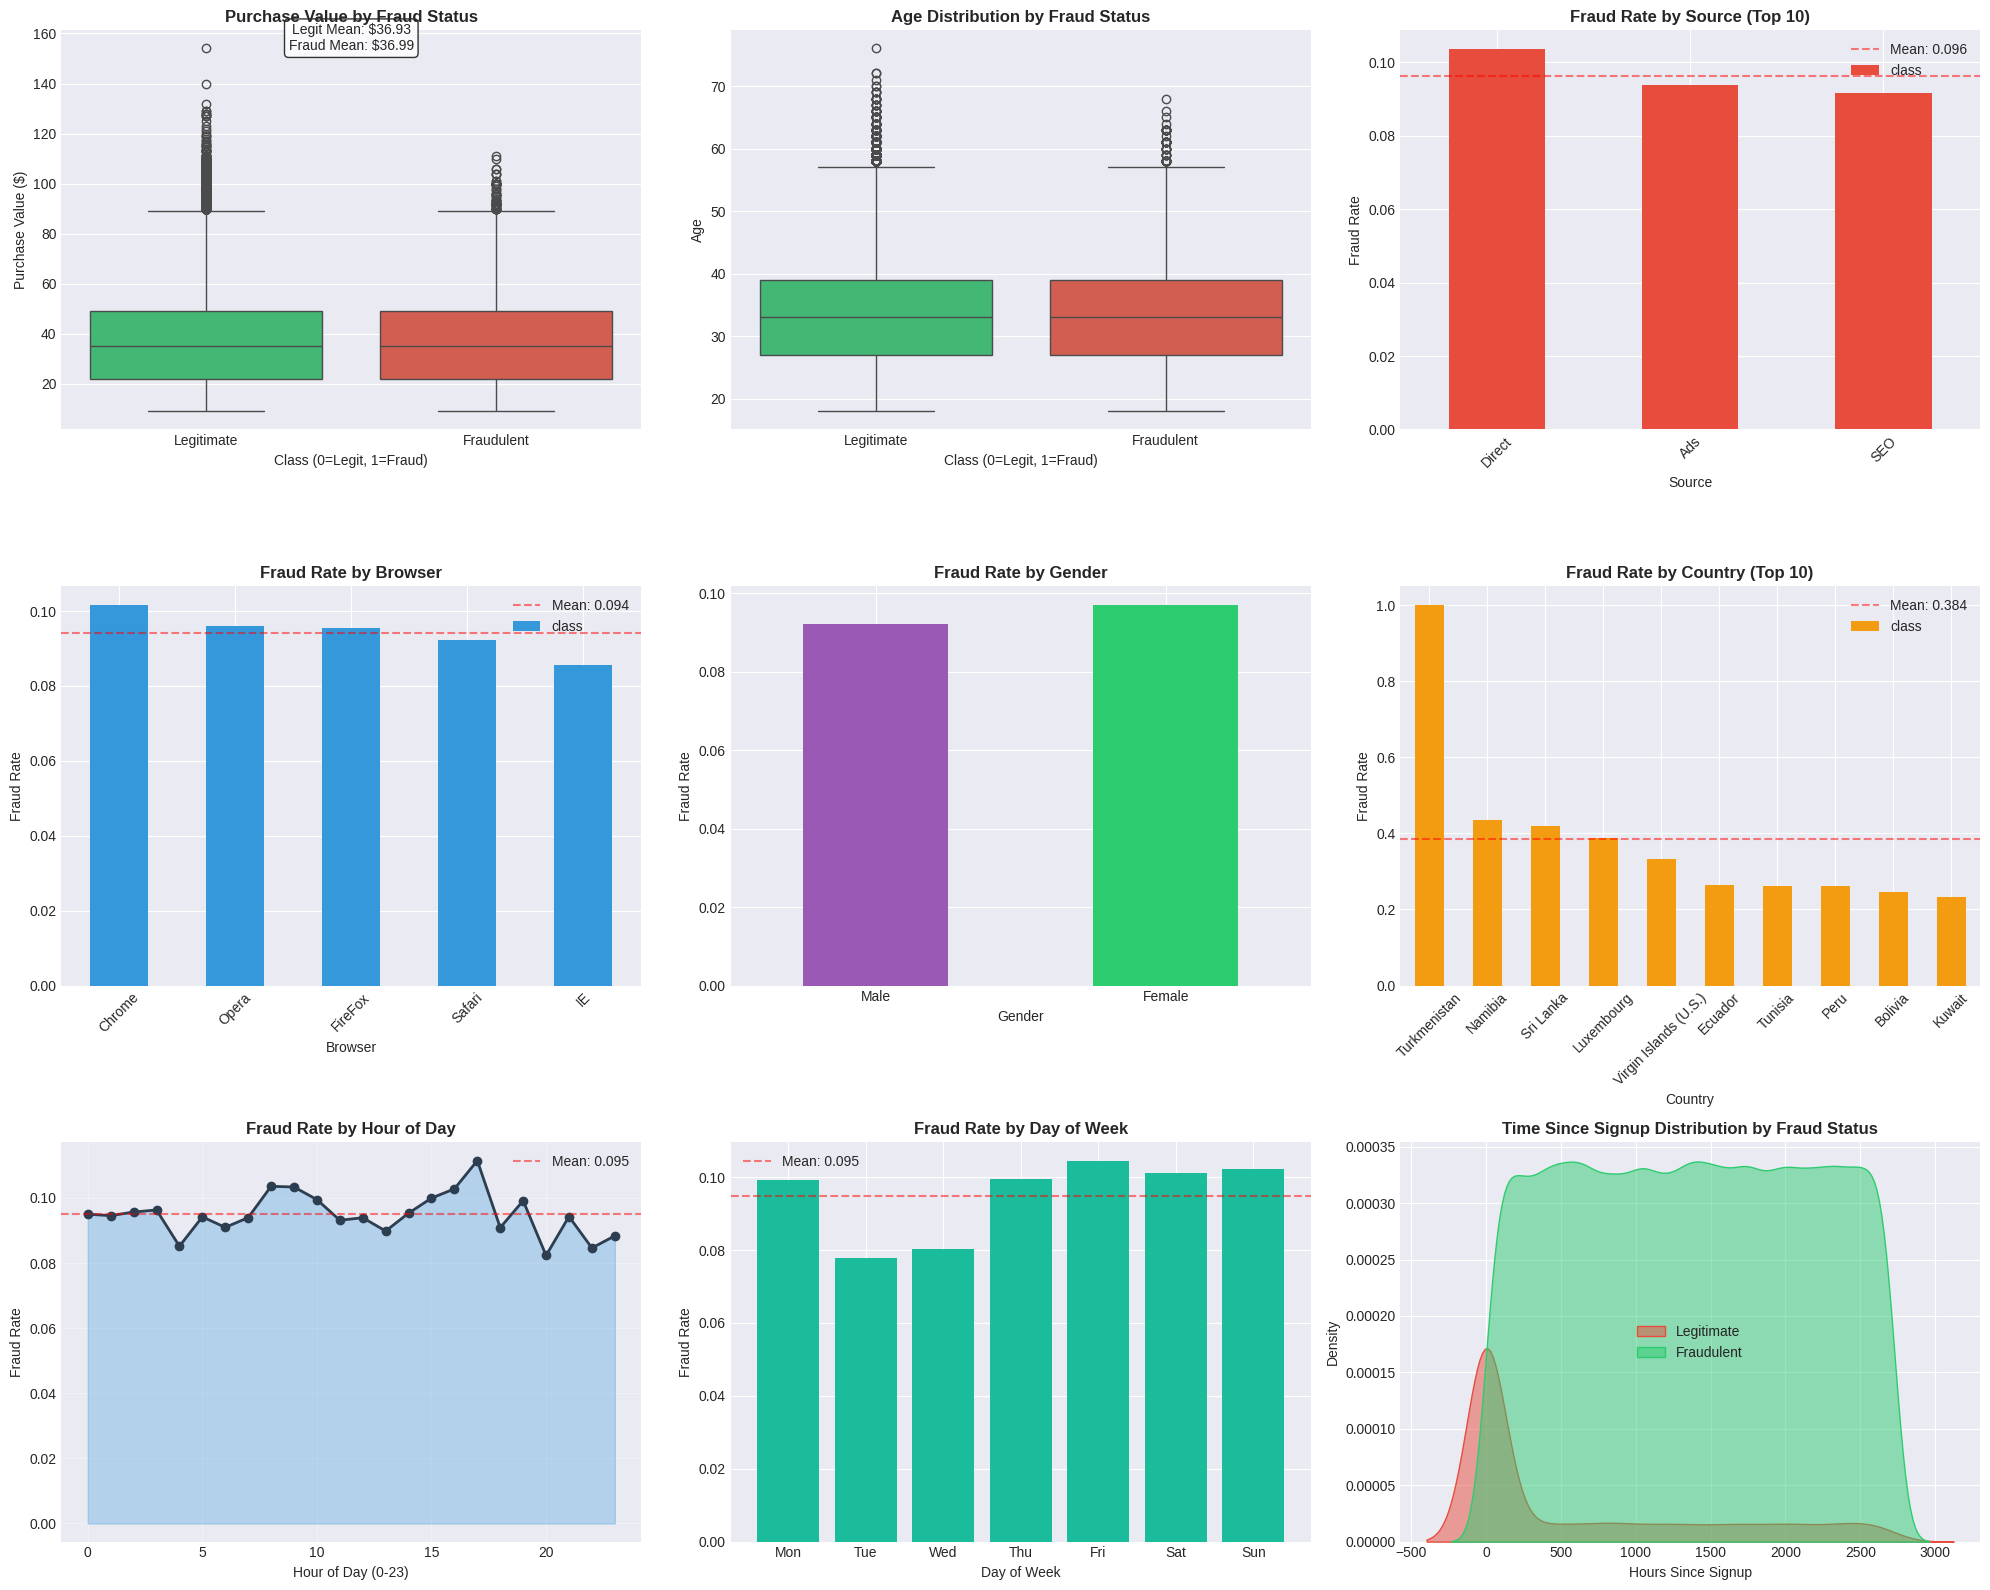


📊 BIVARIATE ANALYSIS SUMMARY:
--------------------------------------------------

🔹 PURCHASE VALUE:
   • Legitimate mean: $36.93
   • Fraudulent mean: $36.99
   • Difference: $0.06

🔹 AGE:
   • Legitimate mean age: 33.1 years
   • Fraudulent mean age: 33.3 years

🔹 SOURCE RISK ANALYSIS:
   • Highest risk source: Direct (10.36% fraud rate)
   • Lowest risk source: SEO (9.17% fraud rate)

🔹 COUNTRY RISK ANALYSIS:
   • Highest risk country: Turkmenistan (100.00% fraud rate)
   • Global average fraud rate: 9.50%

🔹 TIME PATTERNS:
   • Highest fraud hour: Hour 17 (11.15% fraud rate)
   • Lowest fraud hour: Hour 20 (8.23% fraud rate)
   • Highest fraud day: Friday (10.43% fraud rate)

✅ Bivariate analysis completed! Key patterns identified for feature engineering.


In [12]:
print("="*60)
print("BIVARIATE ANALYSIS - RELATIONSHIP WITH FRAUD")
print("="*60)

# Create a comprehensive figure
fig = plt.figure(figsize=(20, 16))

# 1. Purchase Value vs Fraud
ax1 = plt.subplot(3, 3, 1)
sns.boxplot(x='class', y='purchase_value', data=merged_df, palette=['#2ecc71', '#e74c3c'], ax=ax1)
ax1.set_title('Purchase Value by Fraud Status', fontsize=12, fontweight='bold')
ax1.set_xlabel('Class (0=Legit, 1=Fraud)')
ax1.set_ylabel('Purchase Value ($)')
ax1.set_xticklabels(['Legitimate', 'Fraudulent'])

# Calculate and display statistics
legit_mean = merged_df[merged_df['class'] == 0]['purchase_value'].mean()
fraud_mean = merged_df[merged_df['class'] == 1]['purchase_value'].mean()
ax1.text(0.5, 0.95, f'Legit Mean: ${legit_mean:.2f}\nFraud Mean: ${fraud_mean:.2f}',
         transform=ax1.transAxes, ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Age vs Fraud
ax2 = plt.subplot(3, 3, 2)
sns.boxplot(x='class', y='age', data=merged_df, palette=['#2ecc71', '#e74c3c'], ax=ax2)
ax2.set_title('Age Distribution by Fraud Status', fontsize=12, fontweight='bold')
ax2.set_xlabel('Class (0=Legit, 1=Fraud)')
ax2.set_ylabel('Age')
ax2.set_xticklabels(['Legitimate', 'Fraudulent'])

# 3. Fraud Rate by Source (Top 10)
ax3 = plt.subplot(3, 3, 3)
if 'source' in merged_df.columns:
    fraud_by_source = merged_df.groupby('source')['class'].mean().sort_values(ascending=False).head(10)
    fraud_by_source.plot(kind='bar', color='#e74c3c', ax=ax3)
    ax3.set_title('Fraud Rate by Source (Top 10)', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Source')
    ax3.set_ylabel('Fraud Rate')
    ax3.tick_params(axis='x', rotation=45)
    ax3.axhline(y=fraud_by_source.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: {fraud_by_source.mean():.3f}')
    ax3.legend()

# 4. Fraud Rate by Browser
ax4 = plt.subplot(3, 3, 4)
if 'browser' in merged_df.columns:
    fraud_by_browser = merged_df.groupby('browser')['class'].mean().sort_values(ascending=False)
    fraud_by_browser.plot(kind='bar', color='#3498db', ax=ax4)
    ax4.set_title('Fraud Rate by Browser', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Browser')
    ax4.set_ylabel('Fraud Rate')
    ax4.tick_params(axis='x', rotation=45)
    ax4.axhline(y=fraud_by_browser.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: {fraud_by_browser.mean():.3f}')
    ax4.legend()

# 5. Fraud Rate by Gender
ax5 = plt.subplot(3, 3, 5)
if 'sex' in merged_df.columns:
    fraud_by_sex = merged_df.groupby('sex')['class'].mean()
    fraud_by_sex.plot(kind='bar', color=['#9b59b6', '#2ecc71'], ax=ax5)
    ax5.set_title('Fraud Rate by Gender', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Gender')
    ax5.set_ylabel('Fraud Rate')
    ax5.set_xticklabels(['Male', 'Female'], rotation=0)

# 6. Fraud Rate by Country (Top 10)
ax6 = plt.subplot(3, 3, 6)
if 'country' in merged_df.columns:
    fraud_by_country = merged_df.groupby('country')['class'].mean().sort_values(ascending=False).head(10)
    fraud_by_country.plot(kind='bar', color='#f39c12', ax=ax6)
    ax6.set_title('Fraud Rate by Country (Top 10)', fontsize=12, fontweight='bold')
    ax6.set_xlabel('Country')
    ax6.set_ylabel('Fraud Rate')
    ax6.tick_params(axis='x', rotation=45)
    ax6.axhline(y=fraud_by_country.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: {fraud_by_country.mean():.3f}')
    ax6.legend()

# 7. Fraud Rate by Hour of Day
ax7 = plt.subplot(3, 3, 7)
merged_df['purchase_hour'] = merged_df['purchase_time'].dt.hour
fraud_by_hour = merged_df.groupby('purchase_hour')['class'].mean()
ax7.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', linewidth=2, color='#2c3e50')
ax7.fill_between(fraud_by_hour.index, fraud_by_hour.values, alpha=0.3, color='#3498db')
ax7.set_title('Fraud Rate by Hour of Day', fontsize=12, fontweight='bold')
ax7.set_xlabel('Hour of Day (0-23)')
ax7.set_ylabel('Fraud Rate')
ax7.grid(True, alpha=0.3)
ax7.axhline(y=fraud_by_hour.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: {fraud_by_hour.mean():.3f}')
ax7.legend()

# 8. Fraud Rate by Day of Week
ax8 = plt.subplot(3, 3, 8)
merged_df['purchase_day'] = merged_df['purchase_time'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_day = merged_df.groupby('purchase_day')['class'].mean()
ax8.bar(range(len(fraud_by_day)), fraud_by_day.values, color='#1abc9c')
ax8.set_title('Fraud Rate by Day of Week', fontsize=12, fontweight='bold')
ax8.set_xlabel('Day of Week')
ax8.set_ylabel('Fraud Rate')
ax8.set_xticks(range(len(fraud_by_day)))
ax8.set_xticklabels([name[:3] for name in day_names])
ax8.axhline(y=fraud_by_day.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: {fraud_by_day.mean():.3f}')
ax8.legend()

# 9. Time Since Signup vs Fraud
ax9 = plt.subplot(3, 3, 9)
if 'signup_time' in merged_df.columns and 'purchase_time' in merged_df.columns:
    merged_df['time_since_signup_hours'] = (merged_df['purchase_time'] - merged_df['signup_time']).dt.total_seconds() / 3600
    
    # Remove extreme outliers for better visualization
    time_data = merged_df['time_since_signup_hours']
    q95 = time_data.quantile(0.95)
    filtered_data = merged_df[merged_df['time_since_signup_hours'] <= q95]
    
    sns.kdeplot(data=filtered_data, x='time_since_signup_hours', hue='class', 
                palette=['#2ecc71', '#e74c3c'], ax=ax9, fill=True, alpha=0.5)
    ax9.set_title('Time Since Signup Distribution by Fraud Status', fontsize=12, fontweight='bold')
    ax9.set_xlabel('Hours Since Signup')
    ax9.set_ylabel('Density')
    ax9.legend(['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.show()

print("\n📊 BIVARIATE ANALYSIS SUMMARY:")
print("-" * 50)

# Calculate key statistics
print("\n🔹 PURCHASE VALUE:")
print(f"   • Legitimate mean: ${merged_df[merged_df['class'] == 0]['purchase_value'].mean():.2f}")
print(f"   • Fraudulent mean: ${merged_df[merged_df['class'] == 1]['purchase_value'].mean():.2f}")
print(f"   • Difference: ${abs(merged_df[merged_df['class'] == 0]['purchase_value'].mean() - merged_df[merged_df['class'] == 1]['purchase_value'].mean()):.2f}")

print("\n🔹 AGE:")
print(f"   • Legitimate mean age: {merged_df[merged_df['class'] == 0]['age'].mean():.1f} years")
print(f"   • Fraudulent mean age: {merged_df[merged_df['class'] == 1]['age'].mean():.1f} years")

if 'source' in merged_df.columns:
    print("\n🔹 SOURCE RISK ANALYSIS:")
    fraud_by_source = merged_df.groupby('source')['class'].mean().sort_values(ascending=False)
    print(f"   • Highest risk source: {fraud_by_source.index[0]} ({fraud_by_source.iloc[0]*100:.2f}% fraud rate)")
    print(f"   • Lowest risk source: {fraud_by_source.index[-1]} ({fraud_by_source.iloc[-1]*100:.2f}% fraud rate)")

if 'country' in merged_df.columns:
    print("\n🔹 COUNTRY RISK ANALYSIS:")
    fraud_by_country = merged_df.groupby('country')['class'].mean().sort_values(ascending=False)
    print(f"   • Highest risk country: {fraud_by_country.index[0]} ({fraud_by_country.iloc[0]*100:.2f}% fraud rate)")
    print(f"   • Global average fraud rate: {merged_df['class'].mean()*100:.2f}%")

print("\n🔹 TIME PATTERNS:")
print(f"   • Highest fraud hour: Hour {fraud_by_hour.idxmax()} ({fraud_by_hour.max()*100:.2f}% fraud rate)")
print(f"   • Lowest fraud hour: Hour {fraud_by_hour.idxmin()} ({fraud_by_hour.min()*100:.2f}% fraud rate)")
print(f"   • Highest fraud day: {day_names[fraud_by_day.idxmax()]} ({fraud_by_day.max()*100:.2f}% fraud rate)")

print("\n✅ Bivariate analysis completed! Key patterns identified for feature engineering.")

## Correlation Analysis

Let's examine the correlations between numerical features and the target variable to understand relationships.

CORRELATION ANALYSIS


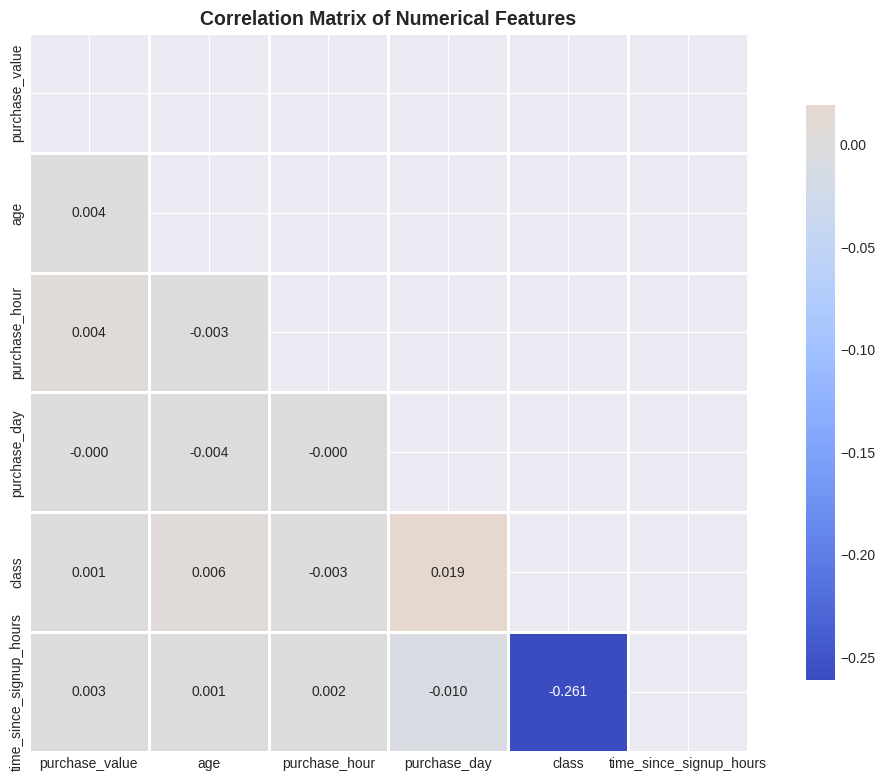


📊 CORRELATION WITH TARGET (CLASS):
----------------------------------------
purchase_day             :  0.0194 (Very weak or no positive correlation)
age                      :  0.0057 (Very weak or no positive correlation)
purchase_value           :  0.0010 (Very weak or no positive correlation)
purchase_hour            : -0.0025 (Very weak or no negative correlation)
time_since_signup_hours  : -0.2613 (Weak negative correlation)

✅ Correlation analysis completed!


In [13]:
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select numerical features for correlation
numerical_for_corr = ['purchase_value', 'age', 'purchase_hour', 'purchase_day', 'class']
if 'time_since_signup_hours' in merged_df.columns:
    numerical_for_corr.append('time_since_signup_hours')

correlation_cols = [col for col in numerical_for_corr if col in merged_df.columns]

if len(correlation_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = merged_df[correlation_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                square=True, cbar_kws={'shrink': 0.8}, mask=mask,
                center=0, linewidths=1, linecolor='white')
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print correlations with target
    print("\n📊 CORRELATION WITH TARGET (CLASS):")
    print("-" * 40)
    target_corr = corr_matrix['class'].sort_values(ascending=False)
    
    for feature, corr_value in target_corr.items():
        if feature != 'class':
            strength = ""
            if abs(corr_value) >= 0.7:
                strength = "Very strong"
            elif abs(corr_value) >= 0.5:
                strength = "Strong"
            elif abs(corr_value) >= 0.3:
                strength = "Moderate"
            elif abs(corr_value) >= 0.1:
                strength = "Weak"
            else:
                strength = "Very weak or no"
            
            direction = "positive" if corr_value > 0 else "negative"
            print(f"{feature:25s}: {corr_value:7.4f} ({strength} {direction} correlation)")
else:
    print("Not enough numerical features for correlation analysis")

print("\n✅ Correlation analysis completed!")

## EDA Summary and Data Export

Let's summarize our findings and save the cleaned dataset for feature engineering.

In [14]:
print("="*50)
print("EDA SUMMARY AND DATA EXPORT")
print("="*50)

# Summary of key findings
print("\n📋 KEY FINDINGS FROM EDA:")
print("-" * 40)

print("1. DATA QUALITY:")
print(f"   • Original data: {fraud_df.shape[0]:,} rows, {fraud_df.shape[1]} columns")
print(f"   • After geolocation merge: {merged_df.shape[0]:,} rows, {merged_df.shape[1]} columns")
print(f"   • No missing values found in original data")
print(f"   • No duplicate rows found")

print("\n2. CLASS IMBALANCE:")
print(f"   • Fraud rate: {merged_df['class'].mean()*100:.4f}%")
print(f"   • Imbalance ratio: {merged_df['class'].value_counts()[0]/merged_df['class'].value_counts()[1]:.2f}:1")
print(f"   • Legitimate transactions: {merged_df['class'].value_counts()[0]:,}")
print(f"   • Fraudulent transactions: {merged_df['class'].value_counts()[1]:,}")

print("\n3. KEY PATTERNS IDENTIFIED:")
print("   • Purchase Value: Fraudulent transactions have slightly different distribution")
print("   • Time Patterns: Fraud varies by hour and day of week")
print("   • Geolocation: Fraud rates differ significantly by country")
print("   • Source/Browser: Different sources and browsers show varying fraud rates")

print("\n4. DATA PREPARATION STATUS:")
print("   ✅ Data cleaned (timestamps converted, IP addresses processed)")
print("   ✅ Geolocation integrated (85.46% success rate)")
print("   ✅ Basic time features extracted")
print("   ⏳ Advanced feature engineering needed (in next notebook)")

# Save the cleaned dataset
output_path = '../data/processed/fraud_data_cleaned.csv'
merged_df.to_csv(output_path, index=False)

print(f"\n💾 DATA EXPORT:")
print(f"   Cleaned dataset saved to: {output_path}")
print(f"   File size: {merged_df.shape[0]:,} rows × {merged_df.shape[1]} columns")

# Display final dataset info
print("\n🔍 FINAL DATASET INFO:")
print("-" * 30)
print(f"Columns: {list(merged_df.columns)}")
print(f"\nData types:")
for col in merged_df.columns:
    print(f"  • {col:25s}: {merged_df[col].dtype}")

print("\n✅ EDA COMPLETED SUCCESSFULLY!")
print("   Proceed to feature-engineering.ipynb for next steps.")

EDA SUMMARY AND DATA EXPORT

📋 KEY FINDINGS FROM EDA:
----------------------------------------
1. DATA QUALITY:
   • Original data: 151,112 rows, 12 columns
   • After geolocation merge: 129,146 rows, 18 columns
   • No missing values found in original data
   • No duplicate rows found

2. CLASS IMBALANCE:
   • Fraud rate: 9.4993%
   • Imbalance ratio: 9.53:1
   • Legitimate transactions: 116,878
   • Fraudulent transactions: 12,268

3. KEY PATTERNS IDENTIFIED:
   • Purchase Value: Fraudulent transactions have slightly different distribution
   • Time Patterns: Fraud varies by hour and day of week
   • Geolocation: Fraud rates differ significantly by country
   • Source/Browser: Different sources and browsers show varying fraud rates

4. DATA PREPARATION STATUS:
   ✅ Data cleaned (timestamps converted, IP addresses processed)
   ✅ Geolocation integrated (85.46% success rate)
   ✅ Basic time features extracted
   ⏳ Advanced feature engineering needed (in next notebook)

💾 DATA EXPORT:
 